In [4]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np

Using TensorFlow backend.
/home/dfernandez/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dfernandez/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dfernandez/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dfernandez/.local/lib/python3.6/site-packages/t

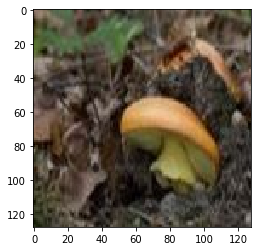

In [47]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

im = cv2.imread("/home/dfernandez/Desktop/Ironhack/Mushroom-project/Mushroom-classifier/Input/Final-photos/Amanita-cesarea/1cfb7c1936ed56e9699905a1947a47a0.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [60]:
from PIL import Image
im = Image.open("/home/dfernandez/Desktop/Ironhack/Mushroom-project/Mushroom-classifier/Input/Final-photos/Amanita-cesarea/2c61bcb3f1a6ac002bdcdae8e5bceedc.jpg")

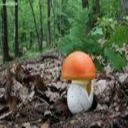

In [61]:
im

In [64]:
np.array(im.getdata())

array([[106, 154,  96],
       [ 91, 134,  81],
       [ 55,  91,  47],
       ...,
       [ 40,  33,  25],
       [ 26,  19,  11],
       [ 34,  27,  17]])

In [77]:
os.chdir("/home/dfernandez/Desktop/Ironhack/Mushroom-project/Mushroom-classifier/Input/Final-photos/Amanita-cesarea")

In [108]:
import os

In [144]:
os.chdir("/home/dfernandez/Desktop/Ironhack/Mushroom-project/Mushroom-classifier")

In [134]:
path = !pwd
path

['/home/dfernandez/Desktop/Ironhack/Mushroom-project/Mushroom-classifier/Input/Final-photos/Lactarius-deliciosus']

In [135]:
counter = 1
for file in glob.iglob('*.*'):
    dst = "Lactarius-deliciosus" + str(counter) + ".jpg"
    src = str(path[0]) + "/" + file 
    dst = str(path[0]) + "/" + dst      
    os.rename(src, dst)
    counter += 1

In [145]:
!pwd

/home/dfernandez/Desktop/Ironhack/Mushroom-project/Mushroom-classifier


In [146]:
for file in glob.glob('./Input/Final-photos/*/*'):
    im = np.array(Image.open(file))
    print(file)
    print(im.shape)
    a = np.concatenate(im)

)
./Input/Final-photos/Amanita-phalloides/Amanita-phalloides229.jpg
(128, 128, 3)
./Input/Final-photos/Amanita-phalloides/Amanita-phalloides394.jpg
(128, 128, 3)
./Input/Final-photos/Amanita-phalloides/Amanita-phalloides299.jpg
(128, 128, 3)
./Input/Final-photos/Amanita-phalloides/Amanita-phalloides423.jpg
(128, 128, 3)
./Input/Final-photos/Amanita-phalloides/Amanita-phalloides154.jpg
(128, 128, 3)
./Input/Final-photos/Amanita-phalloides/Amanita-phalloides383.jpg
(128, 128, 3)
./Input/Final-photos/Amanita-phalloides/Amanita-phalloides274.jpg
(128, 128, 3)
./Input/Final-photos/Amanita-phalloides/Amanita-phalloides503.jpg
(128, 128, 3)
./Input/Final-photos/Amanita-phalloides/Amanita-phalloides307.jpg
(128, 128, 3)
./Input/Final-photos/Amanita-phalloides/Amanita-phalloides121.jpg
(128, 128, 3)
./Input/Final-photos/Amanita-phalloides/Amanita-phalloides112.jpg
(128, 128, 3)
./Input/Final-photos/Amanita-phalloides/Amanita-phalloides479.jpg
(128, 128, 3)
./Input/Final-photos/Amanita-phalloide

In [147]:
a.shape

(16384, 3)

In [ ]:
def class_name(name):
    if re.findall(r"\/{name}\/",file):
        print(file)

In [246]:
import re
classes = {"/Amanita-cesarea/" : 1,
           "/Amanita-muscaria/" : 2,
           "/Amanita-phalloides/" : 3,
           "/Boletus-edulis/" : 4,
           "/Lactarius-deliciosus/" : 5
            }
def class_name(name):
    lista = []
    for file in glob.glob('./Input/Final-photos/*/*'):
        x = re.findall(f"{name}",file)
        for k,v in classes.items():
            if k in x:
                lista.append(v)
    return lista       

In [262]:
y = []
for e in classes:
    print(class_name(e))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 